# Data Science Project: Planning Stage (Individual)

**Name:** Victoria Chen  
**Student Number:** 66263492  
**Section:** 004  
**Group:** 30  

## 1. Data Description

In [1]:
# Load tidyverse package
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Download and read dataset
download.file("https://raw.githubusercontent.com/vichen15/dsci100-004-30-indv/refs/heads/main/players.csv", destfile = "players.csv")
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Basic Information

The `players.csv` data was collected by The Pacific Laboratory for Artificial Intelligence (PLAI), a research group based in the Department of Computer Science at the University of British Columbia. By setting up the Minecraft server, PLAICraft, they were able to collect data about players and how they interacted with the game. This dataset contains player-level information, with each observation representing one unique player.

From reading in the dataset, I observe the following: 
- Number of observations (rows): 196  
- Number of variables (columns): 7

| Variable | Type | Description | Possible values (if categorical) | Notes |
| -- | -- | -- | -- | -- |
| experience | chr | Player's experience level | Beginner, Amateur, Regular, Pro, Veteran | Experience level may be inconsistent due to subjectivity |
| subscribe | lgl | Whether the player is subscribed to the newsletter | TRUE, FALSE | Will serve as the target variable later |
| hashedEmail | chr | Player's email (hashed) | | Can be used as a unique identifier |
| played_hours | dbl | Number of hours the player has played on the server | | May contain outliers (e.g. zeros for inactive players) |
| name | chr | Player's name | | May not be unique |
| gender | chr | Player's gender | Male, Female, Non-binary, Two-Spirited, Agender, Other, Prefer not to say | Lack of observations for some categories |
| Age | dbl | Player's age in years | | Contains an "NA" value |

### Summary Statistics

In [3]:
# Factorize categorical variables
players <- players |>
  mutate(
    experience = factor(experience,
                        levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"),
                        ordered = TRUE),
    gender = factor(gender)
  )

# Calculate summary statistics for each variable
summary(players)

    experience subscribe       hashedEmail         played_hours    
 Beginner:35   Mode :logical   Length:196         Min.   :  0.000  
 Amateur :63   FALSE:52        Class :character   1st Qu.:  0.000  
 Regular :36   TRUE :144       Mode  :character   Median :  0.100  
 Pro     :14                                      Mean   :  5.846  
 Veteran :48                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
     name                         gender         Age       
 Length:196         Agender          :  2   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Male             :124   Median :19.00  
                    Non-binary       : 15   Mean   :21.14  
                    Other            :  1   3rd Qu.:22.75  
                    Prefer not to say: 11   Max.   :58.00  
                    Two-Spirited    

Using the `summary` command, I notice that:
- The most prevalent experience level of players is "Amateur", followed by "Veteran".
- The proportion of individuals subscribed to the newsletter is 144 / 196 = 73.47%.
- The average number of hours played is 5.846, yet the median is only 0.1.
- The mean (21.14) and median (19.00) ages are both approximately 20 years old.

## 2. Questions

### Broad Question

> What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question

> Can `played_hours` and `Age` predict the value of `subscribe` in `players.csv`?

Variables:
- Response/dependent variable: `subscribe`
- Explanatory/independent variables: `played_hours`, `Age`

I want to know whether or not the two listed explanatory variables can successfully predict the response variable. Since `subscribe` is categorical, specifically binary, I will need to use a binary classification method. In this class, we learned the K-nearest neighbors algorithm, which uses numeric predictors to predict a value for the response variable. In this case, `played_hours` and `Age` are both already `dbl` variables, so I can use them directly in the model. 

## 3. Exploratory Data Analysis and Visualization

### Wrangling into Tidy Format

In [4]:
# Factorize response variable
players <- players |>
  mutate(
    subscribe = factor(subscribe)
  )

### Mean Values

In [5]:
# Calculate means of each quantitative variable

players_means <- players |>
  summarize(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours)
  )

players_means

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


### Visualizations

#### Time played vs. Player age Scatterplots

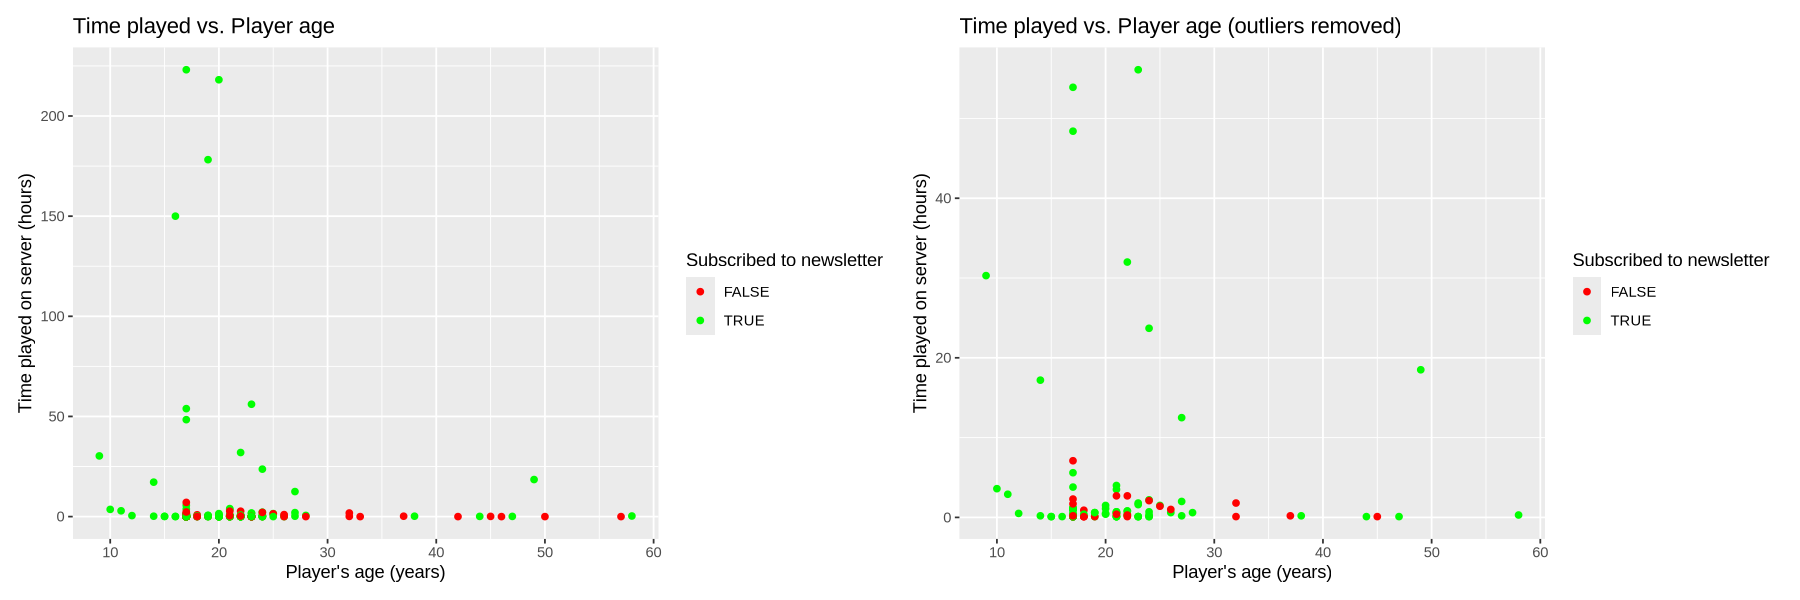

In [6]:
# Set-up
options(repr.plot.width = 15, repr.plot.height = 5)
library(patchwork)

# Remove NA values from data
players <- players |> 
  filter(!is.na(Age), !is.na(played_hours))

# Graph the relationship between time played, player age, and subscription status
scatterplot_1 <- players |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Time played vs. Player age",
       x = "Player's age (years)", 
       y = "Time played on server (hours)",
       color = "Subscribed to newsletter") +
  scale_color_manual(values = c("red", "green"))

# Remove extreme outliers from the data
played_hours_trimmed <- players |>
  filter(played_hours <= 100) |>
  filter(played_hours > 0)

# Graph the relationship again with the trimmed data
scatterplot_2 <- played_hours_trimmed |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Time played vs. Player age (outliers removed)",
       x = "Player's age (years)", 
       y = "Time played on server (hours)",
       color = "Subscribed to newsletter") +
  scale_color_manual(values = c("red", "green"))

# Print graphs side-by-side
scatterplot_1 + scatterplot_2

**Time played vs. Player age**
- I first started by creating a scatterplot by graphing `played_hours` against `Age`. I coloured the points red or green based on the value of `subscribe`.
- I found that almost all of the points were near zero on the y-axis and that more points were closer to zero on the x-axis as well.
- There were some high outliers of `played_hours` in this graph that made the rest of the values difficult to see.
- I was unable to make any conclusions from this graph.

**Time played vs. Player age (outliers removed)**
- To create this graph, I removed all points where `played_hours` exceeded 100 to get rid of the outliers.
- What I found after zooming in was that the majority of the data actually sat below 10 hours on the y-axis.
- I found that there was a cluster of points between 0-10 hours on the y-axis and between 10-30 years on the x-axis.

#### Histograms

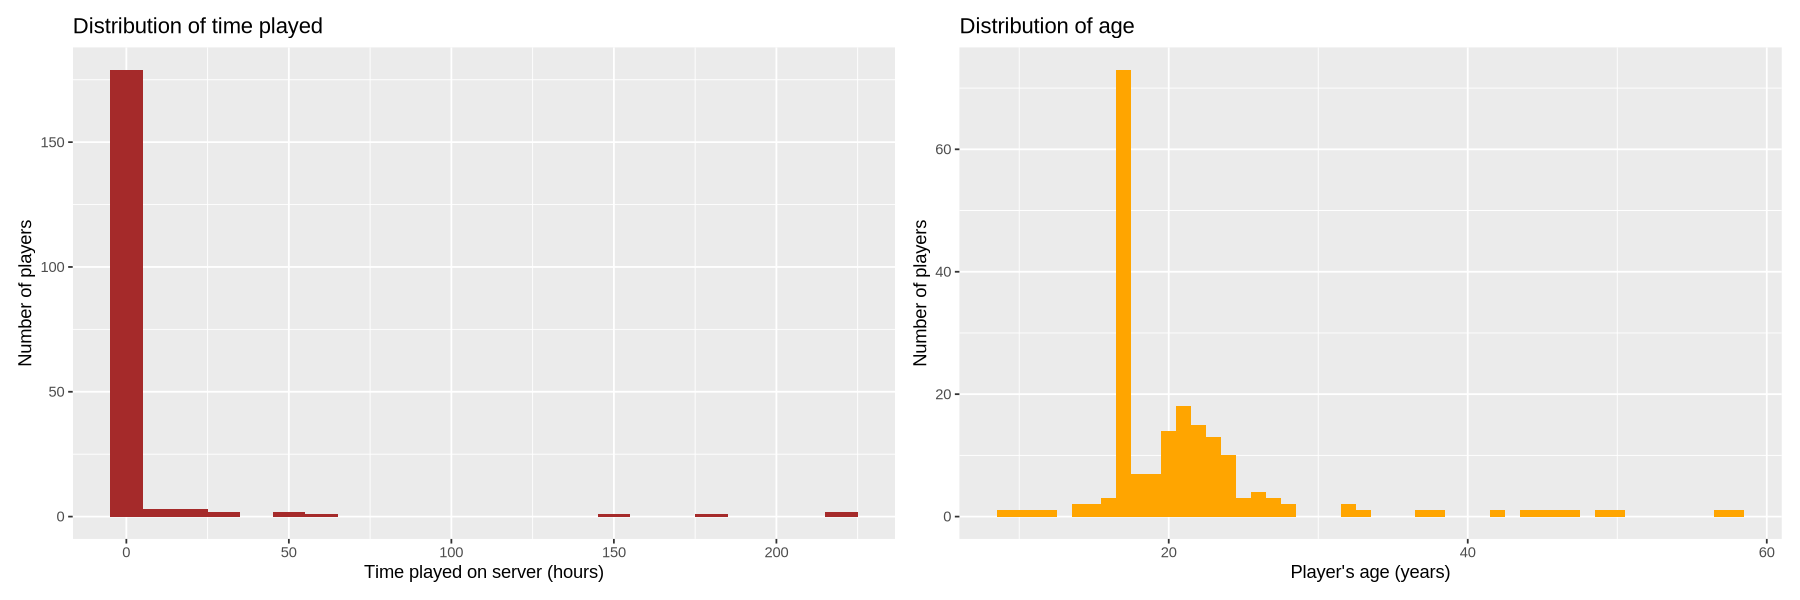

In [7]:
# Create a histogram of the distribution of time played
histogram_hours <- players |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "brown") +
  labs(title = "Distribution of time played",
       x = "Time played on server (hours)",
       y = "Number of players")

# Create a histogram of the distribution of age
histogram_age <- players |>
  ggplot(aes(x = Age)) +
  geom_histogram(binwidth = 1, fill = "orange") +
  labs(title = "Distribution of age",
       x = "Player's age (years)",
       y = "Number of players")

# Print both histograms side-by-side
histogram_hours + histogram_age

**Distribution of time played**
- The histogram I created using the variable `played_hours` shows that the majority of players were inactive or played less than 10 hours.
- Because of this skew, the data may not be useful in predictions where the time played is over 10 hours.

 **Distribution of age**
 - This histogram of the distribution of `Age` shows a large concentration around 17 years old.
 - This tells me that the data is not evenly spread across age groups, and may be more relevant to younger players.

## 4. Methods and Plan

### Method

One method to address my question "Can `played_hours` and `Age` predict the value of `subscribe` in `players.csv`?" is using a K-nearest neighbours classification algorithm. This method would be appropriate since we are looking for a categorical response variable, `subscribe` (TRUE/FALSE) using two numeric variables.

### Assumptions

- **No missing values**: The kNN classification model requires there to be no "NA" values in the dataset.
- **Outliers should be addressed**: Outliers affect the model's ability to predict values and should be removed or adjusted.
- **Standardized scales**: The predictors (`played hours` and `Age`) will need to be scaled and centered before training the model to avoid one variable dominating the distance computation.
- **Numeric predictors**: Numeric predictor values are needed for the model to calculate distance.

### Potential Limitations / Weaknesses

- **Imbalanced classes**: There are 144 subscribed players and only 52 who are not subscribed. The model may favour subscribed players in its calculations.
- **Outliers**: The outliers in my data may affect my model's ability to accurately predict the value of `subscribe`.
- **Choice of *k***: Choosing an inappropriate *k* can result in under-fitting or over-fitting of the data points.

### Model Selection

- To select the most accurate model, I will use cross-validation to compare the predictive abilities of different *k* values.
- I will use `initial_split` to split the data into training and testing sets, and `tune` *k* on the training set.
- The `collect_metrics` function will allow me to determine the *k* value with the highest accuracy.

### Data Processing

Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
- I will split the data into training and testing sets using the `initial_split` function.
- Since this is a smaller dataset, I will use a 70/30 split with 70% training data and 30% testing data.
- I will do this before beginning any model training or preprocessing.
- With the training set, I will perform 5-fold cross-validation using `vfold_cv`.
- In each fold, one subset of data will act as a validation set to choose the best *k* value for the kNN algorithm.

## 5. GitHub Link

https://github.com/vichen15/dsci100-004-30-indv